# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import scipy.stats as sct
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
df=athletes
print(df.shape)
df.head()

(11538, 11)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [58]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [89]:
alpha = 0.05

In [88]:
def q1():
    alpha = 0.05
    return sct.shapiro(height)[1]> alpha
q1()

False

#### Para refletir:

* Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado p-value hacking, e não é legal).

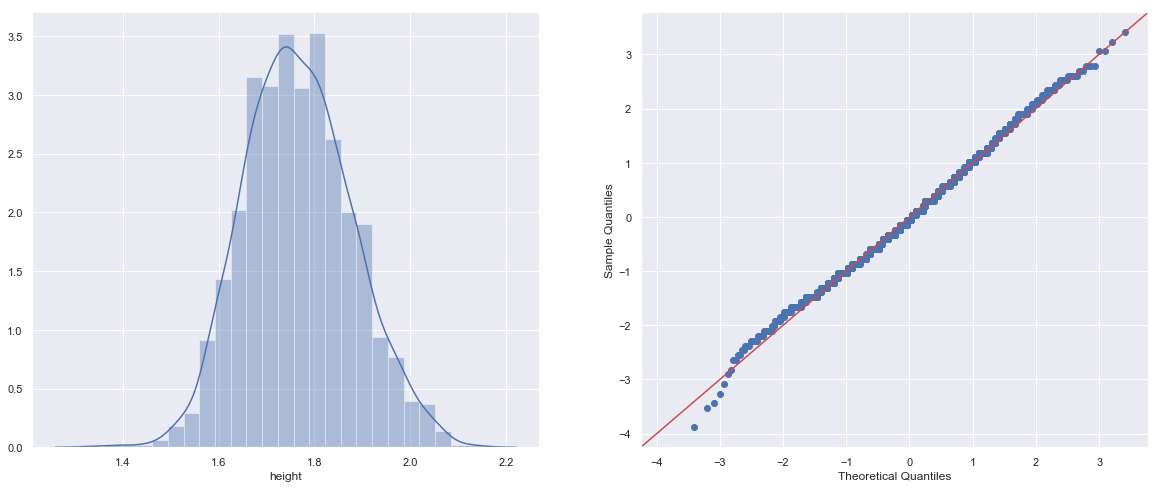

In [56]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize = (20,8))
sns.distplot(height,bins=25,ax=ax1);
sm.qqplot(height, fit = True,line = '45',ax=ax2);

Com base nos gráficos podemos notar que a amostra `heights` parece muito seguir uma distribuição normal, portanto o teste apresenta um Erro do tipo 1, que é quando se rejeita a Hipótese Nula sendo ela verdadeira.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [60]:
def q2():
    
    return sct.jarque_bera(height)[1]> alpha
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

In [61]:
print('Skewness: ',height.skew(),'\n',
      'Kurtosis: ',height.kurt(),'\n',)

Skewness:  0.15982888594665348 
 Kurtosis:  -0.04487456446662286 



Gerando números que seguem uma distribuição normal e checando sua assimetria e taxa de dispersão:

In [70]:
r = pd.Series(sct.norm.rvs(size=3000))
print('Skewness: ',r.skew(),'\n',
      'Kurtosis: ',r.kurt(),'\n',)

Skewness:  0.029671787626025875 
 Kurtosis:  -0.03215505210614955 



Podemos concluir que a simetria (skew) e a medida de dispersão (kurtosis) do sample se aproxima muito de uma curva Normal, provavelmente o resultado 'false' também é um [Erro do tipo 1](https://pt.wikipedia.org/wiki/Erro_do_tipo_I)

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [72]:
weights = get_sample(df,'weight', n = 3000)

In [83]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return sct.normaltest(weights)[1] > alpha
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

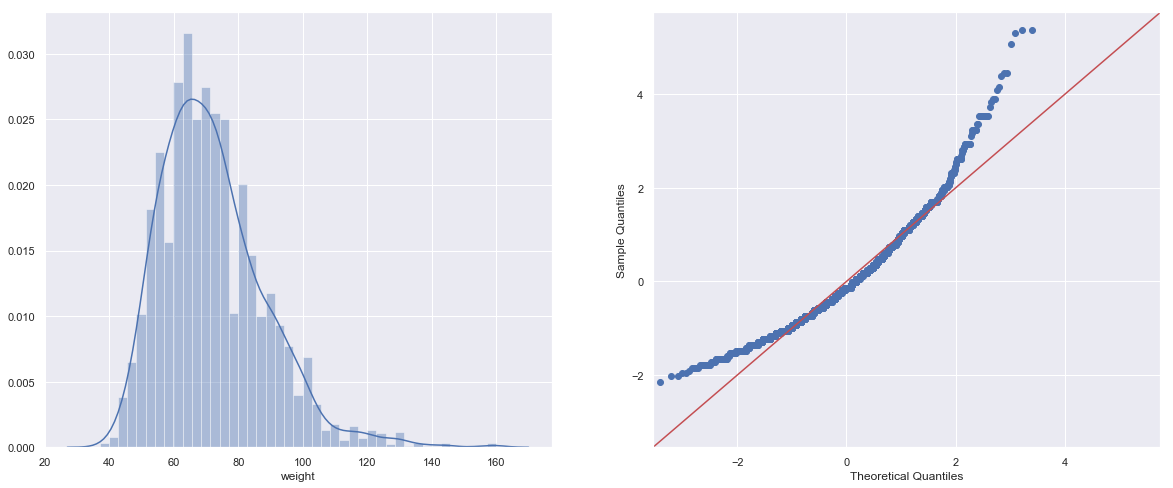

In [82]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20,8))

sns.distplot(weights,ax=ax1);
sm.qqplot(weights,fit=True,line='45',ax=ax2);

A resposta e a forma do gráfico foram condizentes, uma vez que podemos ver que a distribuição da coluna de pesos não segue uma distribuição normal, pois tem uma assimetria positiva

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [90]:
logw = np.log(weights)

In [98]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return sct.normaltest(logw)[1] > alpha
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

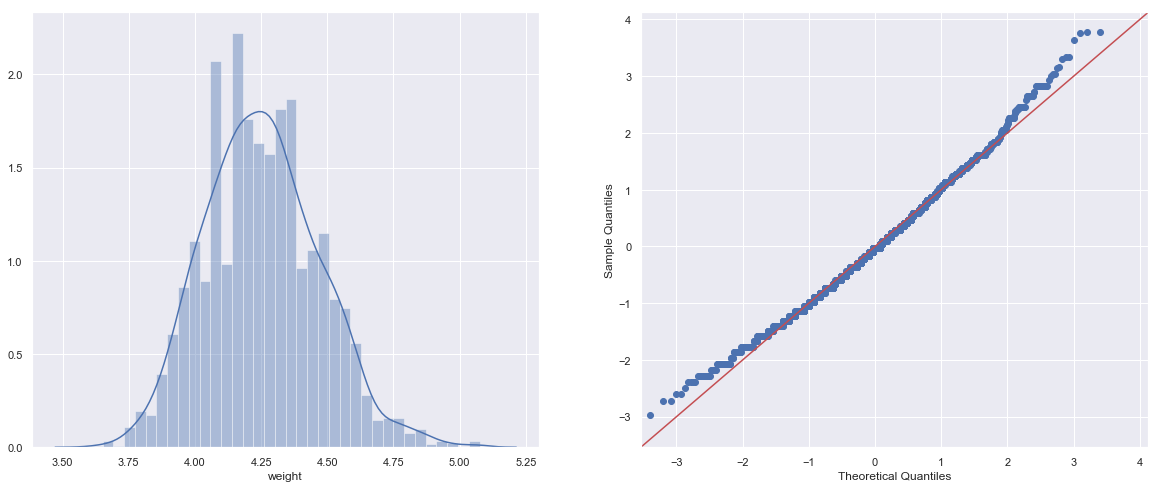

In [100]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,8))

sns.distplot(logw, ax=ax1);
sm.qqplot(logw,fit = True, line = '45', ax=ax2);

Como esperado, a distribução do logarítimo da coluna de pesos aparentemente segue a curva normal, pois seu resultado é análogo ao [Teorema Central do Limite](https://pt.wikipedia.org/wiki/Teorema_central_do_limite). Entretanto, Possivelmente temos outro erro do tipo 1

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [94]:
hcan = df[df['nationality'] == 'CAN']['height'].dropna()
hbra = df[df['nationality'] == 'BRA']['height'].dropna()
heua = df[df['nationality'] == 'USA']['height'].dropna()

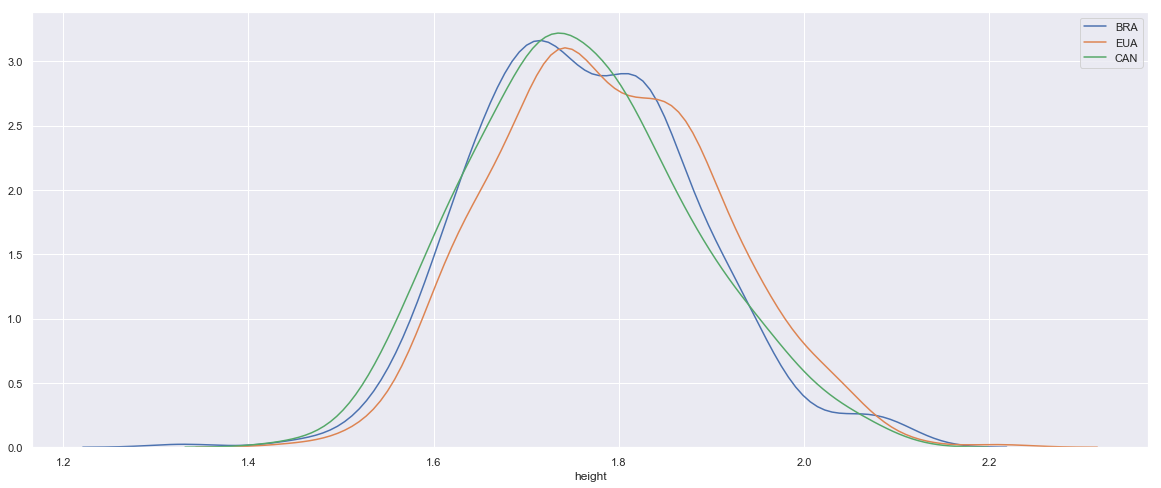

In [96]:
sns.distplot(hbra, label = 'BRA',hist = False)
sns.distplot(heua,label = 'EUA',hist = False)
sns.distplot(hcan, label = 'CAN',hist = False)
plt.legend();

In [97]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return sct.ttest_ind(hbra, heua)[1] > alpha
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [101]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return sct.ttest_ind(hbra, hcan)[1] > alpha
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [102]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return round(sct.ttest_ind(heua, hcan, equal_var = False)[1],8)
q7()

0.00046601